In [12]:
import pandas as pd 
import numpy as np

In [13]:
data_train = pd.read_csv(r'C:\Users\Malek\Documents\DataScientist\model linieare\datasets\Dataset_feuilles_1.csv')
data_test = pd.read_csv(r'C:\Users\Malek\Documents\DataScientist\model linieare\datasets\Dataset_test_feuilles.csv')

In [14]:
data_train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


Organize the data

In [20]:
# Transform species values to number label
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder().fit(data_train.species)
data_train.species = labelencoder.transform(data_train.species)

In [21]:
data_train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [31]:
# Define the target and the features


# Define the target and the features
Y = data_train.iloc[:, 1]
X = data_train.iloc[:, 2:]



In [34]:
# Normalize the features X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaler = scaler.transform(X)

In [51]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_scaler , Y ,
                                                       test_size = 0.25
                                                      ,stratify=Y)
#stratify=Y means that every kind of leaves will be present at the same 
#proportion in the train and test set.

## K-NN

In [52]:
# Baseline with k-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train , Y_train)

In [60]:
Y_pred = knn.predict(X_test)
Y_prob = knn.predict_proba(X_test)

In [61]:
from sklearn.metrics import accuracy_score , log_loss
baseline_accuracy = accuracy_score(Y_test , Y_pred)
baseline_logloss = log_loss(Y_test , Y_prob)

In [62]:
print(baseline_accuracy)
print(baseline_logloss)

0.9637096774193549
0.795705683093108


## SVM Regression 

In [63]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
clf = svm.fit(X_train , Y_train)
y_pred = clf.predict(X_test)

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [64]:
print(accuracy_score(Y_test , y_pred))

0.9637096774193549


The accuracy of the KNN and SVM is almost the same, so we wil go to the Multiclass SVM classifier with optimal hyper-parameters

## Multiclass SVM classifier 

In [68]:
#Multiclass SVM classifier
from sklearn.model_selection import GridSearchCV
lsvm = LinearSVC()
params = {'C':[0.01,0.1,1,10,100],
         'multi_class' : ['ovr' , 'crammer_singer']}
# Here we will test 3 differents hyper-parameters:
    # C: the value of the coefficient of regularization
    # penalty: the norm used for regularization
    # multi_class: the method used for a multi-class problem, One vs rest or Crammer Singer
    # note: for Crammer Singer method, only l2 penalty is possible
gs = GridSearchCV(lsvm , params , cv = 3)

In [69]:
#Trainning the models
gs.fit(X_train , Y_train)

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'multi_class': ['ovr', 'crammer_singer']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
gs.best_params_

{'C': 0.1, 'multi_class': 'crammer_singer'}

It looks like the crammer_singer method is the most efficient with C=0.1

In [75]:
y_pred = gs.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.967741935483871


Let's plot the evolution of the accuracy in terms of the hyper parameters

In [79]:
C = np.logspace(-4, 3, 15)

ovr_clf2 = LinearSVC(dual=False, penalty='l2', multi_class='ovr')
accuracy_ovr2 = []

for c in C:
    ovr_clf2.set_params(C=c)
    ovr_clf2.fit(X_train, Y_train)
    accuracy_ovr2.append(ovr_clf2.score(X_test, Y_test))

cs_clf2 = LinearSVC(dual=False, penalty='l2', multi_class='crammer_singer')
accuracy_cs2 = []
for c in C:
    cs_clf2.set_params(C=c)
    cs_clf2.fit(X_train, Y_train)
    accuracy_cs2.append(cs_clf2.score(X_test, Y_test))

ovr_clf1 = LinearSVC(dual=False, penalty='l1', multi_class='ovr')
accuracy_ovr1 = []
for c in C:
    ovr_clf1.set_params(C=c)
    ovr_clf1.fit(X_train, Y_train)
    accuracy_ovr1.append(ovr_clf1.score(X_test, Y_test))

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

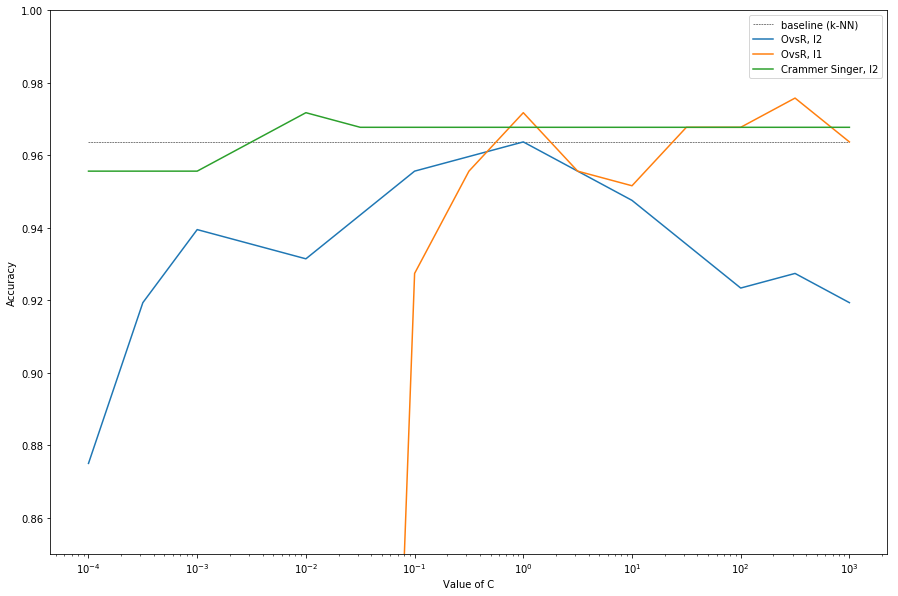

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot([min(C), max(C)], [baseline_accuracy, baseline_accuracy], label='baseline (k-NN)', color='black', linestyle='--', linewidth=0.5)
plt.plot(C, accuracy_ovr2, label='OvsR, l2') 
plt.plot(C, accuracy_ovr1, label='OvsR, l1')
plt.plot(C, accuracy_cs2, label='Crammer Singer, l2')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.axis('tight')
plt.ylim([0.85, 1])
plt.show()